In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster import vq
%matplotlib inline

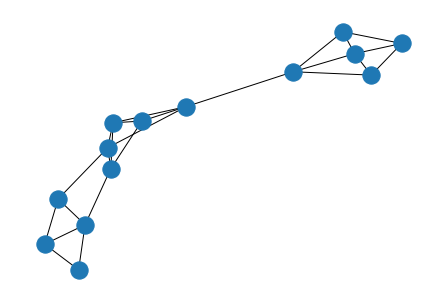

In [2]:
g = nx.Graph()
g.add_edges_from([
    (0, 1),
    (1, 2),
    (2, 3),
    (3, 0),
    (1, 3),
    
    (4, 5),
    (5, 6),
    (6, 7),
    (7, 8), 
    (8, 4),
    (4, 6),
    (6, 8),
    (5, 7),
    
    (9, 10),
    (10, 11),
    (11, 12),
    (12, 13),
    (13, 9),
    (9, 11),
    (10, 12),
    (11, 13),
    
    (2, 4),
    (3, 8),
    (5, 9)    
])
nx.draw(g)

In [3]:
def eig(arr):
    vals, vecs = np.linalg.eig(arr)
    # Sort eigenvectors and values by eigenvalues
    order = np.argsort(vals)
    vals = vals[order]
    vecs = vecs[:, order]
    if vecs[0, 0] < 0:
        # This is not strictly needed, but makes comparing the different Laplacians easier
        vecs *= -1
    return vals.real, vecs.real

In [4]:
A = nx.to_numpy_array(g)
diag = A.sum(axis=1)

L = np.diag(diag) - A
# Don't do np.diag(diag) ** -0.5, since that turns all off-diagonals (0) to inf
L_sym = np.diag(diag**-0.5) @ L @ np.diag(diag**-0.5)
L_rw = np.diag(1/diag) @ L

[3.60822483e-16 1.76000271e-01 7.29435717e-01 2.30202467e+00
 3.00000000e+00 3.10427354e+00 3.51461516e+00 3.80675025e+00
 4.29825119e+00 4.73740757e+00 5.00000000e+00 5.28288060e+00
 5.67138778e+00 6.37697326e+00] [ 2.67261242e-01  3.08986705e-01  4.55847003e-01 -6.26906737e-01
  1.13938396e-16  9.04802720e-02  3.36624711e-01 -1.00616898e-01
 -2.58234471e-01  1.39140743e-01  1.23658960e-16  3.05873130e-02
  9.11225066e-02  7.33442460e-02]
[-6.24500451e-17  5.40305579e-02  2.28434472e-01  8.16824214e-01
  8.43754206e-01  1.00000000e+00  1.06055747e+00  1.14854660e+00
  1.27248739e+00  1.34583711e+00  1.37290070e+00  1.49209901e+00
  1.64088404e+00  1.72364422e+00]
[9.71445147e-17 5.40305579e-02 2.28434472e-01 8.16824214e-01
 8.43754206e-01 1.00000000e+00 1.06055747e+00 1.14854660e+00
 1.27248739e+00 1.34583711e+00 1.37290070e+00 1.49209901e+00
 1.64088404e+00 1.72364422e+00]


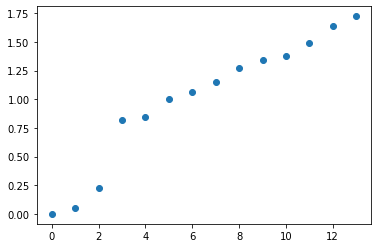

In [5]:
vals, vecs = eig(L)
vals_sym, vecs_sym = eig(L_sym)
vals_rw, vecs_rw = eig(L_rw)
print(vals, vecs[0])
print(vals_sym)
print(vals_rw)
#plt.scatter(range(len(vals)), vals)
plt.scatter(range(len(vals_sym)), vals_sym)

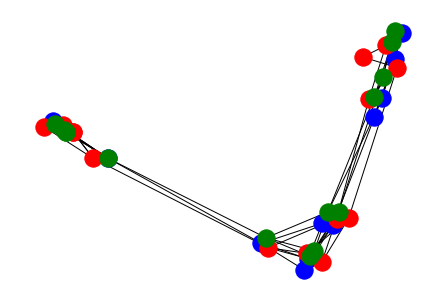

In [6]:
nx.draw(g, pos={n: (vecs[v, 1], vecs[v, 2]) for v, n in enumerate(g)}, node_color='b')
vs = vecs_sym[:, 1:3]
vs = vs/np.sqrt(np.sum(vs**2, axis=1, keepdims=True))
nx.draw(g, pos={n: (vecs_sym[v, 1], vecs_sym[v, 2]) for v, n in enumerate(g)}, node_color='r')
nx.draw(g, pos={n: (vecs_rw[v, 1], vecs_rw[v, 2]) for v, n in enumerate(g)}, node_color='g')

[0 0 0 0 1 1 1 1 1 2 2 2 2 2]


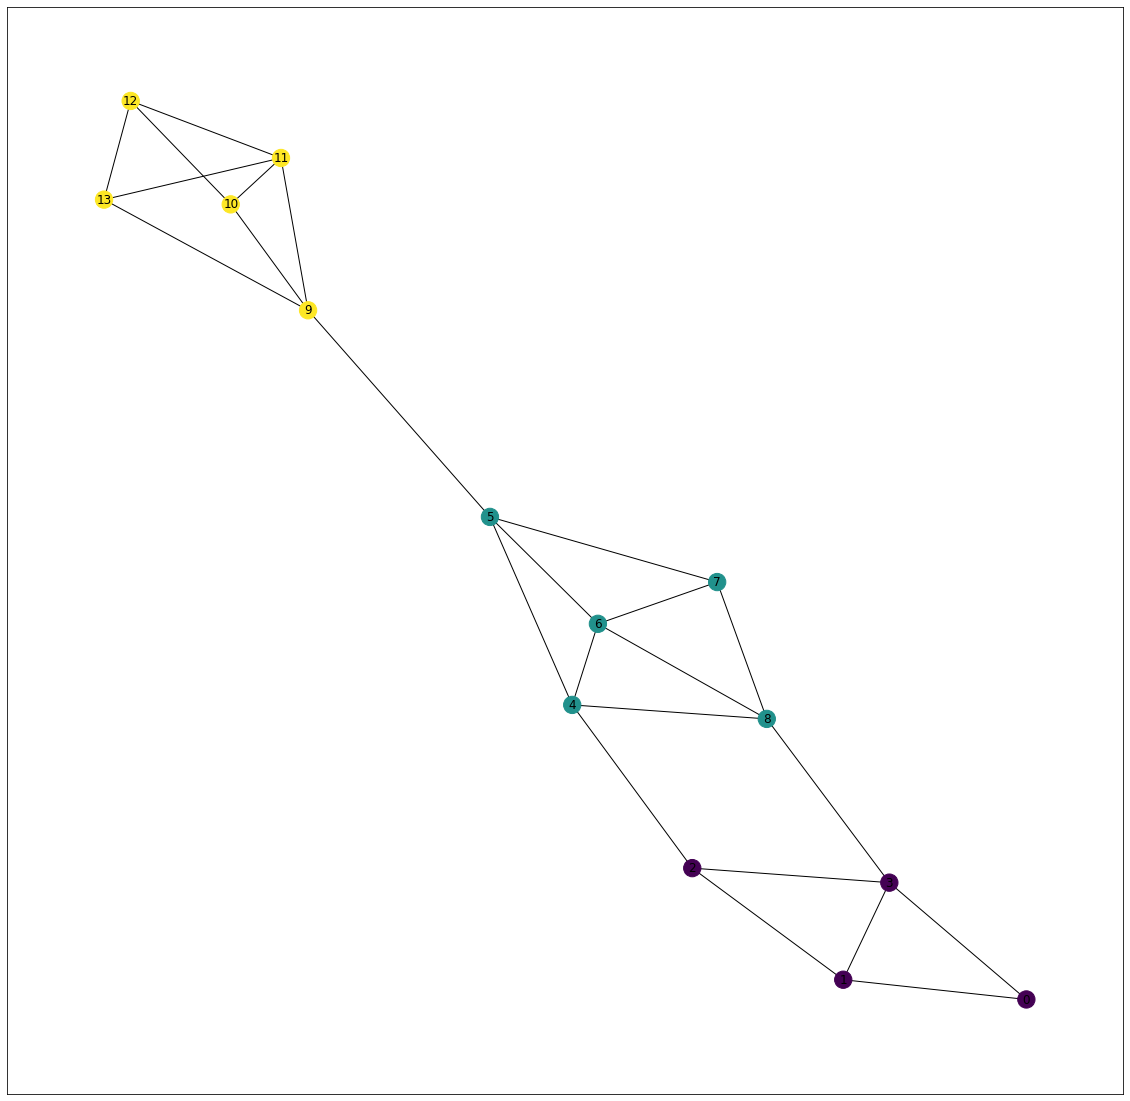

In [8]:
k = 3
obs = vecs_sym[:, 1:1+k]
obs = obs/np.sqrt(np.sum(obs**2, axis=1, keepdims=True))
centroids, dist = vq.kmeans(obs, k, iter=1000)
labels, dist = vq.vq(obs, centroids)
print(labels)
plt.figure(3,figsize=(20,20))
nx.draw_networkx(g, node_color=labels)
plt.show()